# Machine Learning From First Principles
### A Workshop by Jack Fraser-Govil


Hello, and welcome to this notebook. Along with the notes, presentation and discussions which we will be having throughout the day, this document will walk you through a series of tasks and exercises which will culminate, by the end of the workshop, in you possessing a fully working Feedforward Neural Network which you have designed and written from scratch. 

In doing so, we hope that you will gain a degree of insight into how these machines are `thinking' under the hood, and thereby pull back some of the mystery and folklore that surrounds ML, and thereby gain a peek inside the black box. We hope that this knowledge will help inform the discussions and presentations for the rest of this conference. 

## What Do I Need?

In order to run this notebook, all you need is the ability to run an ipython/Jupyter notebooks, and some standard python libraries: mostly ```numpy``` and ```matplotlib```. You do *not* need to have ```tensorflow``` or ```pytorch```: the entire point of this exercise is to create a learning framework without relying on pre-built tools.

You *will* need to have read, or be confident that you already know the mathematics contained within [the provided notes](Notes.pdf). If you haven't read them yet (and are not confident that your skillset includes the vector-chain rule and matrix algebra), then I suggest you speed-read Chapters 2, 3 and 4.

The final thing you need is a willingness to engage with some of the murkier, more difficult and mathematically complex components of the workshop: teasing out what these things *mean* is why you are here; so if something sticks out to you as something you don't understand, don't just let it wash over you -- please ask and we can discuss. 


## What if I get stuck?

The first port of call is always to ask me, one of my helpers, or simply someone near to you, for guidance. 

If there's a concept you just can't grasp during the day, I will point you to some resources that you can look at afterwards, and hopefully things will become clearer in retrospect. 

If you get stuck on one of the coding exercises, or cannot complete it before it is time to move on, you will find a [second notebook in this same directory](notebook_solved.ipynb). This notebook will have all of the coding exercises solved for you. That is not to say that it is 'correct', only that this notebook will be *functional*. If you get really, really, really stuck, you can start stealing code from that document. 

##### However

Whilst it is certainly possible (and permitted) for you to do this at any time, the entire purpose of this workshop is for you to come away with the satisfaction of having written your own learning networks from scratch. We are, by definition, reinventing the wheel here: everything we make will be orders of magnitude worse than pytorch or tensorflow; the principle is that **you learn best by doing it yourself**.

If you're going to use the 'cheat sheet', then try, first of all, to simply look at it to understand what it is doing, and then implement your own version. Don't directly copy whole chunks of code you don't understand, as that sort of defeats the point of today's efforts.


## Jack, Why is this Python Written Like Garbage?

That's a very good and very important question. **I am not a python developer**. As a member of the High Performance Algorithms group, I spend most of my time buried in C++ and C code. I have written this workshop assuming that, since the majority of existing ML products are pythonic, that python would be the most accessible language. There are often times where my python code is written like someone used to C-syntax, and blithely unaware to the beautiful, elegant, pythonic way of doing things.

I'm afraid you'll just have to deal with my slightly sub-par python. 

What was **not** a result of subpar python is the choice not to use ```pandas``` for data. I made a conscious decision to keep things as 'mathematical' as possible, rather than abstracted into dataframes. You get a list of vectors (and maybe some labels), and have to deal with them manually, that's part of the bare-bones experience!

I also use ```CamelCase```, not ```snake_case```. Fight me.

## Exercise 1: The Pretrained Perceptron

Just to get the juices flowing, let's get started with an easy project.

**In the ```Data``` directory is a file ```cuteness.tex```, which contains (non-dimensional) measures of size and furriness of some animals, as well as some human-curated labels (1 for cute, 0 for note cute). Please write a Perceptron function to evaluate (without the labelled data) which of these creatures the model currently mislabels.**  

I've provided some basic functions and a class framework for you to work from.

In [415]:
import numpy as np
import matplotlib.pyplot as pt

##load and parse the data manually. No pandas to be seen here! This function will be used repeatedly to load in our test data. 
def LoadCategoricalData(file):
	names = []
	labels = []
	data = []
	with open(file) as file:
		for line in file:
			entries = line.rstrip().split(' ')
			names.append(entries[0])
			labels.append(int(entries[1]))
			data.append(np.array([ float(entries[i]) for i in range(2,len(entries))]))
	return names, labels, data


names, labels, data = LoadCategoricalData("Data/cuteness.dat")



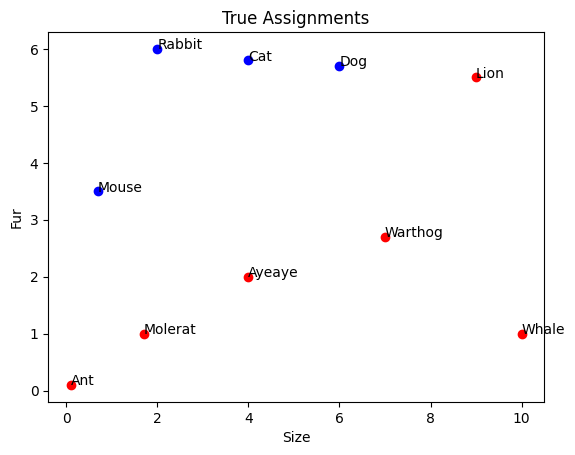

In [416]:
## Here's a basic plotting function, feel free to write your own
def PlotData(positions, labels,names=None):
	cols = ["red","blue"]
	for i,pos in enumerate(positions):
		c = cols[int(labels[i])]
		pt.scatter(pos[0],pos[1],color=c)
		if names is not None:
			pt.annotate(names[i],pos)
	pt.show()



pt.title("True Assignments")
pt.xlabel("Size")
pt.ylabel("Fur")
PlotData(data,labels,names)


Mislabelled animals are: ['Mouse' 'Rabbit' 'Cat' 'Ant' 'Lion' 'Whale' 'Warthog' 'Molerat' 'Ayeaye']
Success Rate= 10%


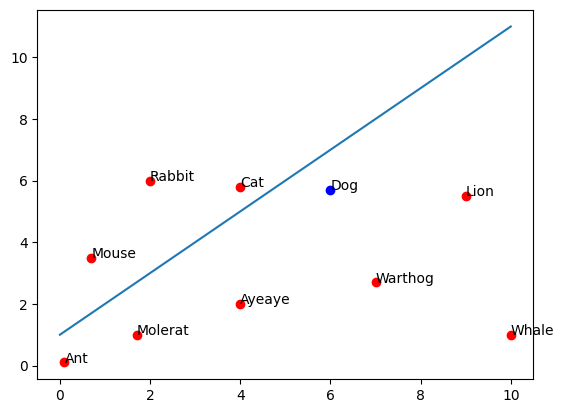

In [417]:
class Perceptron:

	def __init__(self):
		self.Weights = np.array([1,1,-1]) ## we'll use these pre-provided weights for now

	def Predict(self,input):
		
		if type(input) is list:
			out = []
			for r in input:
				# print(r)
				out.append(self.Predict(r))
			return out
		return 1.0 * (np.dot(self.Weights,np.insert(input,0,1)) > 0)

P = Perceptron()

x = np.linspace(0,10,10)
w = P.Weights
y = -w[1]*x/w[2] - w[0]/w[2]
pt.plot(x,y)

predict_labels = P.Predict(data)

# mislabels = p
miss = np.array(names)[predict_labels != np.array(labels)]

print("Mislabelled animals are:", miss)
print(f"Success Rate= {round(100*(1.0 - len(miss) * 1.0/len(names)))}%")

PlotData(data,predict_labels==np.array(labels),names)


## Initialise, then call your Perceptron on data. 

## Training The Perceptron

You should (hopefully) now have a working Perceptron; the only issues is a) it's absolutely terrible and b) I had to give you the weights. 

The next challenge is to write up a training algorithm for the Perceptron. 

**Add a method (Train) to the Perceptron, which iterates over the dataset a number of times (you choose - when is 'enough'?) and updates the weights**

Remember, given a datum $\mathbf{x}$, a prediction $P$ and the correct label $L$ the update formula is:

\begin{equation}
	\mathbf{w} \to \mathbf{w} - r \times \left(P(\mathbf{x}) - L \right)\mathbf{x}
\end{equation}
Where $r$ is your learning rate.

Converged early, after 8 epochs
Mislabelled animals are: []
Success Rate= 100%


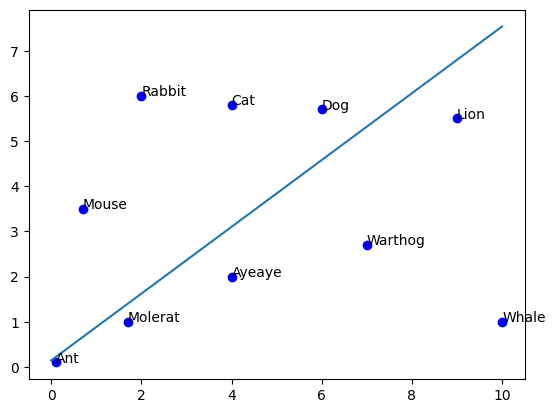

In [418]:
## I'm fully redefining the Perceptron class; just so that these notebook is iteratively solved. You don't have to do that!
class Perceptron:

	def __init__(self):
		self.Weights = np.array([1.0,1,-1]) ## we'll use these pre-provided weights for now

	def Predict(self,input):
		
		if type(input) is list:
			out = []
			for r in input:
				# print(r)
				out.append(self.Predict(r))
			return out
	
		if len(input) == len(self.Weights):
			return 1.0 * (np.dot(self.Weights,input) > 0)
		else:
			return 1.0 * (np.dot(self.Weights,np.insert(input,0,1)) > 0)

	def Train(self, data,labels,fullEpochs = 100):

		rate = 0.2
		for l in range(fullEpochs):
			noMistakes = True
			for r in range(len(data)):
				x = np.insert(data[r],0,1) ## bulk up with the additional dimension.
				P = self.Predict(x)

				update = rate*(labels[r]-P) * x
				self.Weights +=  update
				if (P!= labels[r]):
					noMistakes = False
			if noMistakes:
				print("Converged early, after",l,"epochs")
				return
P = Perceptron()

P.Train(data,labels,50*len(data))

## analyse the missed animals
predict_labels = P.Predict(data)
miss = np.array(names)[predict_labels != np.array(labels)]
print("Mislabelled animals are:", miss)
print(f"Success Rate= {round(100*(1.0 - len(miss) * 1.0/len(names)))}%")

## plot a nice line showing the divide
x = np.linspace(0,10,10)
w = P.Weights
y = -w[1]*x/w[2] - w[0]/w[2]
pt.plot(x,y)


PlotData(data,predict_labels==np.array(labels),names)



## The Wrench in the Works

If everything has gone to plan, you now have an algorithm that can correctly identify whether a given animal is cute or note, based on measures of their size and amount of fur. 

Now try running your Perceptron training & testing routines on a new dataset: ```cuteness_augmented```.

**What goes wrong?**

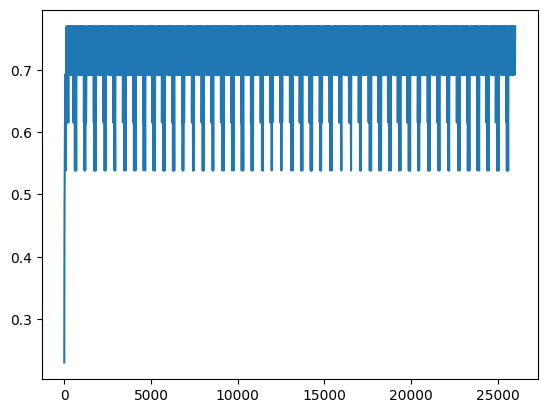

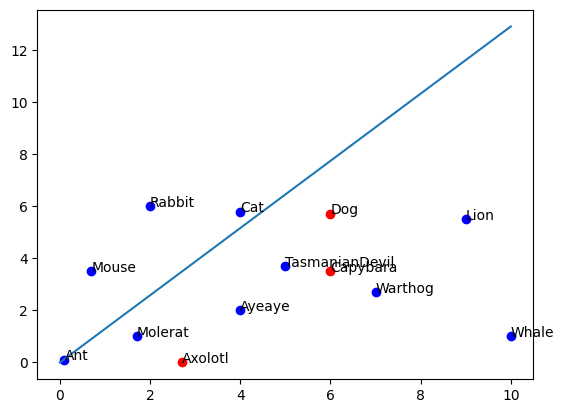

In [419]:
names, labels, data = LoadCategoricalData("Data/cuteness_augmented.dat")
P = Perceptron()

# get random error
predict_labels = P.Predict(data)
miss = predict_labels != np.array(labels)
failure = np.sum(miss) * 1.0/len(data)
s = [0]
p = [1.0 - failure]
for q in range(2000):
	# print(r)
	P.Train(data,labels,1)
	s.append(len(data)*(q+1))
		  
	## analyse the missed animals
	predict_labels = P.Predict(data)
	miss = predict_labels != np.array(labels)
	failure = np.sum(miss) * 1.0/len(data)
	p.append(1.0 - failure)

pt.plot(s,p)
pt.show()

## plot a nice line showing the divide
x = np.linspace(0,10,10)
w = P.Weights
y = -w[1]*x/w[2] - w[0]/w[2]
pt.plot(x,y)


PlotData(data,predict_labels==np.array(labels),names)

Converged early, after 842 epochs


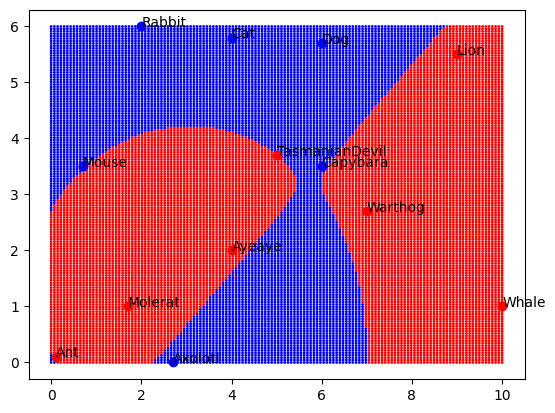

In [425]:
class NonlinearPerceptron:

	def __init__(self,maxPower=1):
		self.Power = maxPower
		self.nDim = int(((maxPower+2) * (maxPower + 1))/2)
		self.Weights = np.zeros((self.nDim,)) ## we'll use these pre-provided weights for now
		self.Weights[0] = 0.5
		self.Weights[1] = 1
		self.Weights[2] = -1

		# print(self.Weights)
	def Predict(self,input,vectorfied=False):
		
		if type(input) is list:
			out = []
			for r in input:
				# print(r)
				out.append(self.Predict(r))
			return out
		if vectorfied:
			return 1.0 * (np.dot(self.Weights,input) > 0)
		else:
			vec = self.Vectorfy(input)
			return 1.0 * (np.dot(self.Weights,vec) > 0)

	def Vectorfy(self,input):
		
		output = np.zeros((self.nDim,))
		output[0] = 1
		s = 1
		
		for power in range(1,self.Power+1):
			for q in range(power+1):
				output[s] = input[0]**q * input[1]**(power-q)
				s+= 1
		return np.array(output)


	def Train(self, data,labels,fullEpochs = 100):
		vectorfied = [self.Vectorfy(d) for d in data]

		##this is a bit of a hack (and a hint at better optimisation routines!)
		## Because my vector has higher powers of x, the optimiser wobbles incoherently if the powers are x**10 as it's simultaenoulsy trying to balance +/- 1 and +/- a billion
		## this slows down the learning at the higher power parameters, letting it be much less sensitive to them

		rate = 0.1
		rates = np.zeros((self.nDim))
		s = 0
		for power in range(self.Power):
			for r in range(power+1):
				rates[s] = rate / 15**power
				s+= 1

			
		for l in range(fullEpochs):
			noMistakes = True
			for r in range(len(data)):
				P = self.Predict(vectorfied[r],True)

				update = rates*(labels[r]-P) * vectorfied[r]
				self.Weights +=  update
				if (P!= labels[r]):
					noMistakes = False
			if noMistakes:
				print("Converged early, after",l,"epochs")
				return
names, labels, data = LoadCategoricalData("Data/cuteness_augmented.dat")


P = NonlinearPerceptron(5)
P.Train(data,labels,20000)

cols = ['red','blue']
x = np.linspace(0,10,140)
y = np.linspace(0,6,140)

N = len(x)*len(y)
xs = np.zeros((N,))
ys = np.zeros((N,))
zs = ['']*N
s= 0
z = np.zeros((len(y),len(x)))
for i,xp in enumerate(x):
	for j,yp in enumerate(y):
		l = P.Predict(np.array([xp,yp]))
		xs[s] = xp
		ys[s] = yp
		zs[s] = cols[int(l)]
		s+=1
		# pt.scatter(x,y,10,cols[int(l)])
# pt.imshow(z,extent=(x.min(),x.max(),y.min(),y.max()),origin ='lower')
pt.scatter(xs,ys,1,zs)
PlotData(data,np.array(labels),names)
pt.show()

In [421]:
import numpy as np

class Network:

	def __init__(self,inputDimension,outputDimension):
		self.Layers = []
		self.InputDim = inputDimension
		self.OutputDim = outputDimension
	def AddLayer(self,nNodes,nodeType):
		self.Layers.append(Layer(nNodes,nodeType))

	def Initialise(self):
		if len(self.Layers) == 0 or len(self.Layers[-1].Nodes) != self.OutputDim:
			print("Adding a linear layer for output conformity")
			self.AddLayer(self.OutputDim,Node())

		prevDim = self.InputDim
		for i in range(len(self.Layers)):
			self.Layers[i].Initialise(prevDim)
			prevDim = len(self.Layers[i].Nodes)
	def Act(self,inputVector):
		self.Layers[0].Act(inputVector)
		for l in range(1,len(self.Layers)):
			self.Layers[l].Act(self.Layers[l-1].Vector)
		return self.Layers[-1].Vector
class Layer:

	def __init__(self,nNodes,nodeType):

		self.Nodes = [nodeType]*nNodes

		self.Vector = np.zeros(nNodes)

	def Initialise(self,nDim):
		for i in range(len(self.Nodes)):
			self.Nodes[i].Initialise(nDim)

	def Act(self,vector):
		for i in range(len(self.Nodes)):
			self.Vector[i] = self.Nodes[i].Act(vector)
class Node:

	def __init__(self,func=None):
		if func is not None:
			self.ActivationFunction = func
	def Initialise(self,nDim):
		self.Weights = np.ones((nDim,))*np.random.random()

	def ActivationFunction(self,x):
		return x
	
	def Act(self,vector):
		return self.ActivationFunction(np.dot(self.Weights,vector))
	

		

In [422]:
network = Network(5,1)
network.AddLayer(10,Node())
network.Initialise()

s=network.Act([5,3,2,1,4])
print(s)

Adding a linear layer for output conformity
[19.12158804]
